In [103]:
import jax
import jax.numpy as jnp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
class LinearRegression():
    def fit(self, X:jax.Array, y:jax.Array):
        self.design_matrix = jnp.vstack((jnp.ones(X.shape[0]), X)).T
        lhs = jnp.dot(self.design_matrix.T, self.design_matrix) # Gram Matrix
        rhs = jnp.dot(self.design_matrix.T, y) 
        self.coeff = jnp.linalg.solve(lhs, rhs) # Solving Normal Equation
        return self

    def predict(self, X:jax.Array):
        return jnp.dot(self.design_matrix, self.coeff) 

### DATA 1: Standard Linear Relationship

In [100]:
x = jnp.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, x.shape)
df1 = pd.DataFrame({'x': x, 'y': y})

y.shape

(100,)

In [102]:
model_fitted = LinearRegression().fit(x, y)
y_pred = model_fitted.predict(x)

In [107]:
X = model_fitted.design_matrix

jnp.isclose(jnp.trace(X @ jnp.linalg.inv(X.T@X) @ X.T), X.shape[1])

Array(True, dtype=bool)

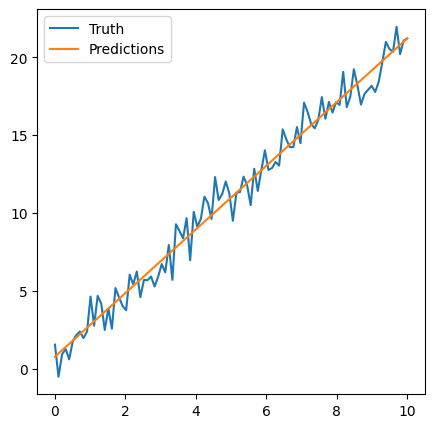

In [105]:
plt.figure(figsize=(5,5))
plt.plot(x, y, label='Truth')
plt.plot(x, y_pred, label='Predictions')
plt.legend()
plt.show()